<a href="https://colab.research.google.com/github/Deepu-Pk/AI-Lab-Assignment-1-/blob/main/Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The weights are:
bias= 0.0, w1= 1.0 , w2= 1.0, w3= 1.0
Input   Output
 [0 0 0]   -1
 [0 0 1]   1
 [0 1 0]   1
 [0 1 1]   1
 [1 0 0]   1
 [1 0 1]   1
 [1 1 0]   1
 [1 1 1]   1


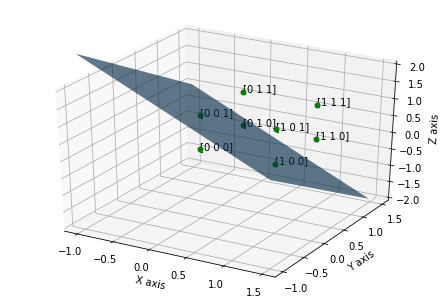

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

weight = np.zeros(4)# add one for bias
iteratins = 300 # no of iterations
learning_rate = 0.5 # learning rate

def activatin_function(X):#Sigmoid function(activation)
  if X > 0:
    return 1
  else:
    return -1

def adder(X):#Summation
  z = np.dot(weight,X)
  r = activatin_function(z)
  return r

def training(X,d):
  global weight
  for _ in range(iteratins):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1) # for setting the bias input to 1
                y = adder(x)
                e = d[i] - y
                weight = weight + learning_rate * e * x
def predictions(X):
  x = np.insert(X,0,1)
  y=adder(x)
  return y 

X = np.array([
      [0, 0, 0], 
      [0, 0, 1], 
      [0, 1, 0], 
      [0, 1, 1], 
      [1, 0, 0], 
      [1, 0, 1], 
      [1, 1, 0], 
      [1, 1, 1] 
    ])#input bolean varables
d = np.array([-1, 1, 1, 1, 1,1,1,1]) #Predicted output

training(X,d)

print("The weights are:")
print("bias= {}, w1= {} , w2= {}, w3= {}".format(weight[0], weight[1], weight[2],weight[3]) )

#Output checking
data = np.array([ 
     [0, 0, 0], 
     [0, 0, 1], 
     [0, 1, 0], 
     [0, 1, 1], 
     [1, 0, 0], 
     [1, 0, 1], 
     [1, 1, 0], 
     [1, 1, 1] 
   ]) 
print("Input   Output")
for i in range(len(data)):
  print(" {}   {}".format(data[i], predictions(data[i])))

# setColor function to give appropriate color for the points plotted in the 3d plane.

# This function predicts the output and depicts the point in red color if its FALSE
# green if TRUE

def setColor(X):
  x = np.insert(X,0,1)
  y=adder(x)
  if y ==0 :
    return "r"
  else:
    return "g"
    
#Plotting
fig = plt.figure()
ax = Axes3D(fig)


X = np.arange(-1, 1.5, .01)
Y = np.arange(-1, 1.5, .01)
X, Y = np.meshgrid(X, Y)
Z = 1-X-Y # Equation of the plane 

ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

for i in range(len(data)):
    ax.scatter(data[i][0],data[i][1],data[i][2],c=setColor(data[i]),s=25, marker="o")
    ax.text(data[i][0],data[i][1],data[i][2],s=str(data[i]))
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)

ax.set_zlim(-2, 2)

plt.show()